In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import skimage

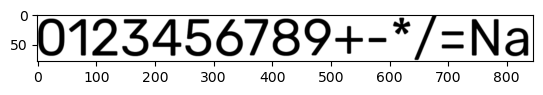

In [2]:
img = plt.imread("texts.png")
img = cv2.cvtColor(img, cv2.COLOR_RGBA2GRAY)

plt.imshow(img, cmap='gray')
plt.show()

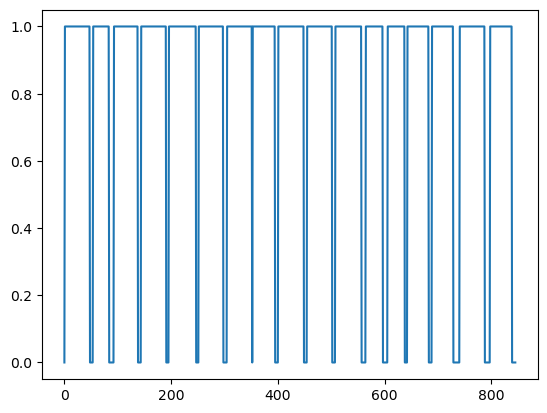

In [3]:
m = np.any(1-img, axis=0)

plt.plot(m)
plt.show()

18


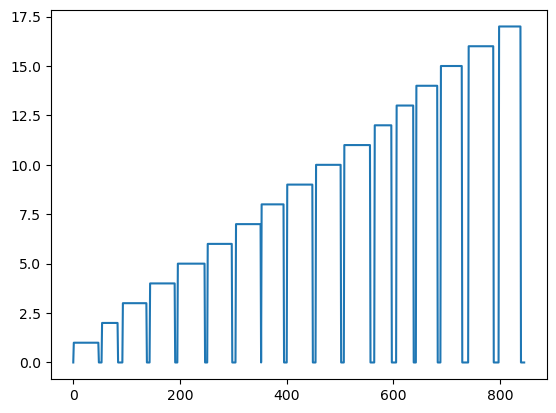

In [4]:
n, cc = cv2.connectedComponents(np.uint8(m), connectivity=8)

print(n)
cc = cc.flatten()
plt.plot(cc)
plt.show()

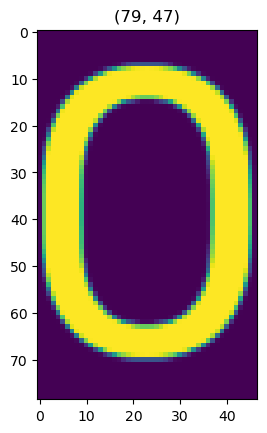

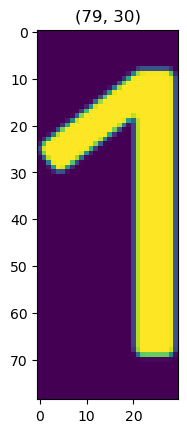

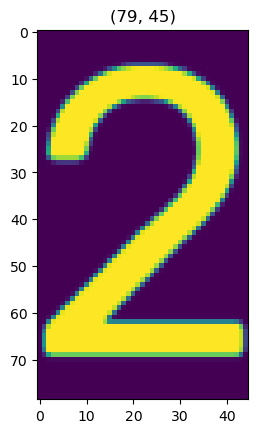

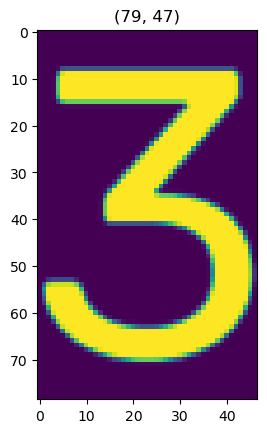

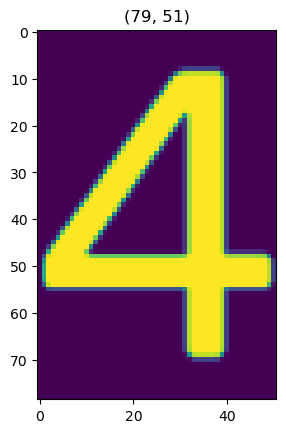

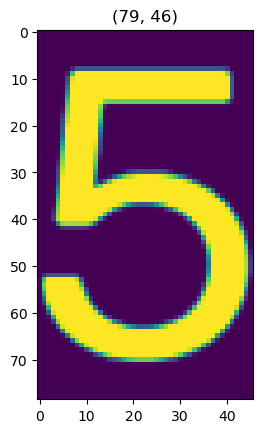

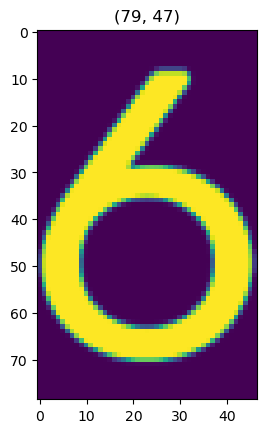

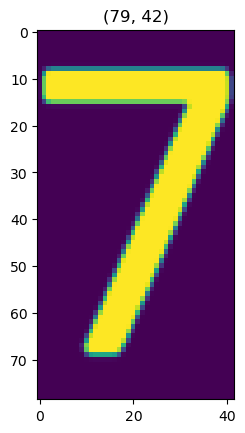

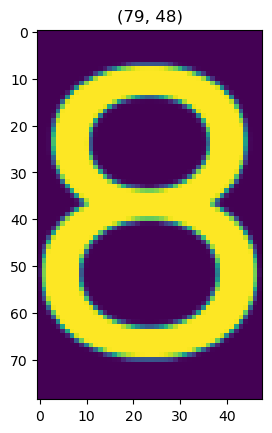

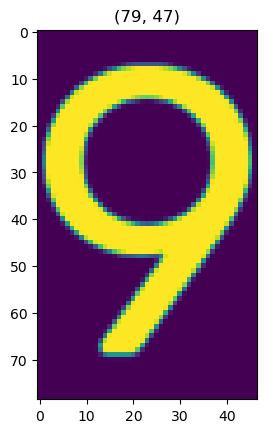

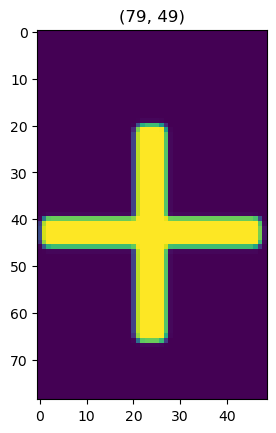

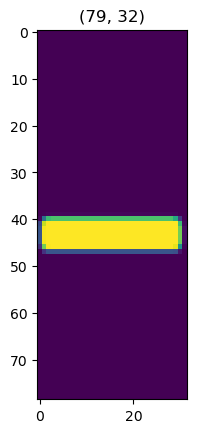

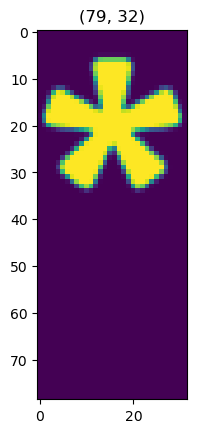

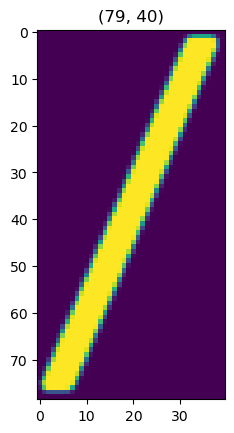

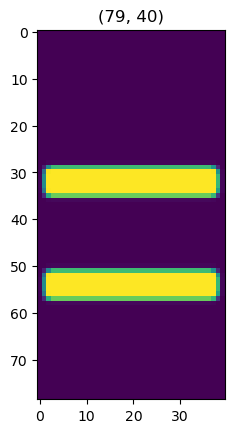

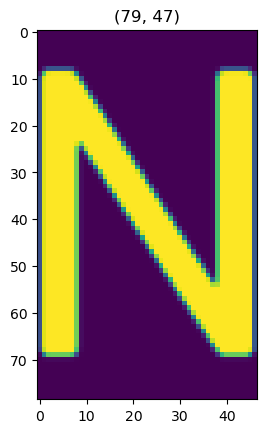

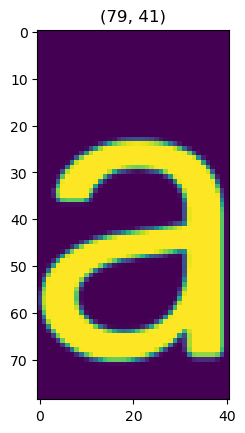

In [5]:
texts = [1-img[:, cc==i] for i in range(1, n)]

for text in texts:
    plt.imshow(text)
    plt.title(text.shape)
    plt.show()

In [6]:
def to_bin_mem(mask):
    mem = ""
    for row in mask:
        for pixel in row:
            mem += str(int(pixel)) + " "
        mem += "\n"
    return mem

In [7]:
names = [
    '0','1','2','3','4','5','6','7','8','9',
    'add', 'sub', 'mul', 'div', 'eq', 'N', 'a'
]

In [8]:
for name, text in zip(names, texts):
    with open(f"{name}.mem", 'w') as file:
        file.write(to_bin_mem(text))
